In [1]:
import os

import numpy as np

# all conditions
domains = ["goal_control", "safety_expected"]
inferences = ["belief_a", "belief_b", "emotion", "outcome"]
goal_control_emotions = ["joyful", "frustrated", "grateful", "disappointed"]
safety_expected_emotions = ["relieved", "resigned", "surprised", "devastated"]
emotions = [
    goal_control_emotions, safety_expected_emotions
]
sets = ["0", "1"]
conditions = []
for i, domain in enumerate(domains):
    for inf in inferences:
        for emotion in emotions[i]:
            for s in sets:
                conditions.append(f"{domain}/{inf}_{emotion}_{s}")

models = ["claude-2.1", "azure_gpt-4"]
methods = ["0shot", "0shot_cot"]
results_path = "../../data/results"
suffix = "_0.0_10_0_graded_answers.txt"

In [2]:
data_files = {}
data = {}
for model in models:
    for method in methods:
        data_files[f"{model}_{method}"] = {}
        data[f"{model}_{method}"] = {}
        for condition in conditions:
            data_files[f"{model}_{method}"][condition] = os.path.join(
                results_path, condition, f"{model}_{method}{suffix}"
            )
            with open(data_files[f"{model}_{method}"][condition], "r") as f:
                lines = f.readlines()
                grades = np.array([int(g) for g in lines])
                data[f"{model}_{method}"][condition] = grades

In [3]:
# compute agreement scores between models 0-shot
agreement_0shot = {}
agreement_0shot_cot = {}
agreement_gpt4_cot_nocot = {}
agreement_claude_cot_nocot = {}
accuracy_gpt4_0shot = {}
accuracy_claude_0shot = {} 
accuracy_gpt4_0shot_cot = {}
accuracy_claude_0shot_cot = {}
for condition in conditions:
    gpt_4_0shot = data["azure_gpt-4_0shot"][condition]
    claude_0shot = data["claude-2.1_0shot"][condition]
    gpt_4_0shot_cot = data["azure_gpt-4_0shot_cot"][condition]
    claude_0shot_cot = data["claude-2.1_0shot_cot"][condition]
    agreement_0shot[condition] = np.sum(gpt_4_0shot == claude_0shot) / len(gpt_4_0shot)
    agreement_0shot_cot[condition] = np.sum(gpt_4_0shot_cot == claude_0shot_cot) / len(gpt_4_0shot_cot)
    agreement_gpt4_cot_nocot[condition] = np.sum(gpt_4_0shot == gpt_4_0shot_cot) / len(gpt_4_0shot)
    agreement_claude_cot_nocot[condition] = np.sum(claude_0shot == claude_0shot_cot) / len(claude_0shot)
    accuracy_gpt4_0shot[condition] = np.sum(gpt_4_0shot) / len(gpt_4_0shot)
    accuracy_claude_0shot[condition] = np.sum(claude_0shot) / len(claude_0shot)
    accuracy_gpt4_0shot_cot[condition] = np.sum(gpt_4_0shot_cot) / len(gpt_4_0shot_cot)
    accuracy_claude_0shot_cot[condition] = np.sum(claude_0shot_cot) / len(claude_0shot_cot)


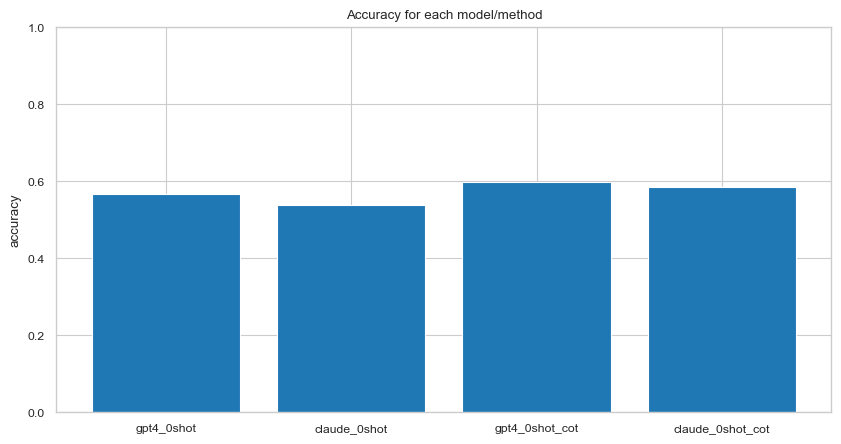

In [7]:
# plot accuracy for each model_method
import matplotlib.pyplot as plt

accuracies_model_method = {}
accuracies_model_method["gpt4_0shot"] = np.mean([v for v in accuracy_gpt4_0shot.values()])
accuracies_model_method["claude_0shot"] = np.mean([v for v in accuracy_claude_0shot.values()])
accuracies_model_method["gpt4_0shot_cot"] = np.mean([v for v in accuracy_gpt4_0shot_cot.values()])
accuracies_model_method["claude_0shot_cot"] = np.mean([v for v in accuracy_claude_0shot_cot.values()])

# make plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(accuracies_model_method)),
    [v for v in accuracies_model_method.values()],
    tick_label=[k for k in accuracies_model_method.keys()],
)
plt.ylim([0, 1])
plt.ylabel("accuracy")

plt.title("Accuracy for each model/method")
plt.show()



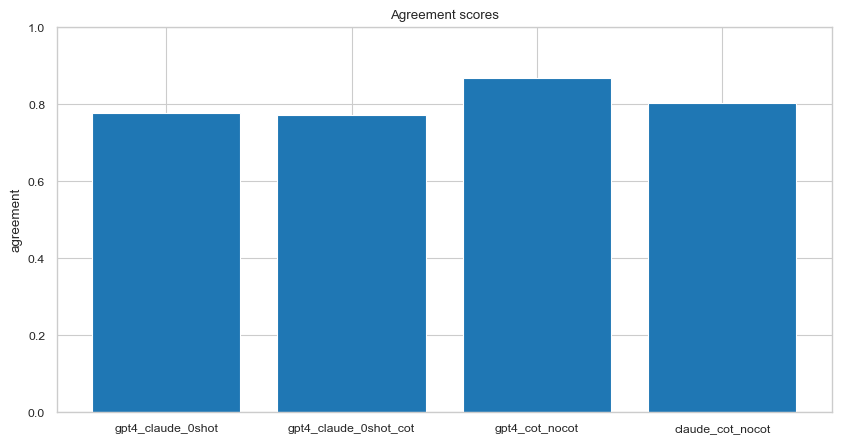

In [8]:
# plot all agreement scores
agreement_scores = {}
agreement_scores["gpt4_claude_0shot"] = np.mean([v for v in agreement_0shot.values()])
agreement_scores["gpt4_claude_0shot_cot"] = np.mean([v for v in agreement_0shot_cot.values()])
agreement_scores["gpt4_cot_nocot"] = np.mean([v for v in agreement_gpt4_cot_nocot.values()])
agreement_scores["claude_cot_nocot"] = np.mean([v for v in agreement_claude_cot_nocot.values()])

# make plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(agreement_scores)),
    [v for v in agreement_scores.values()],
    tick_label=[k for k in agreement_scores.keys()],
)
plt.ylim([0, 1])
plt.ylabel("agreement")
plt.title("Agreement scores")
plt.show()

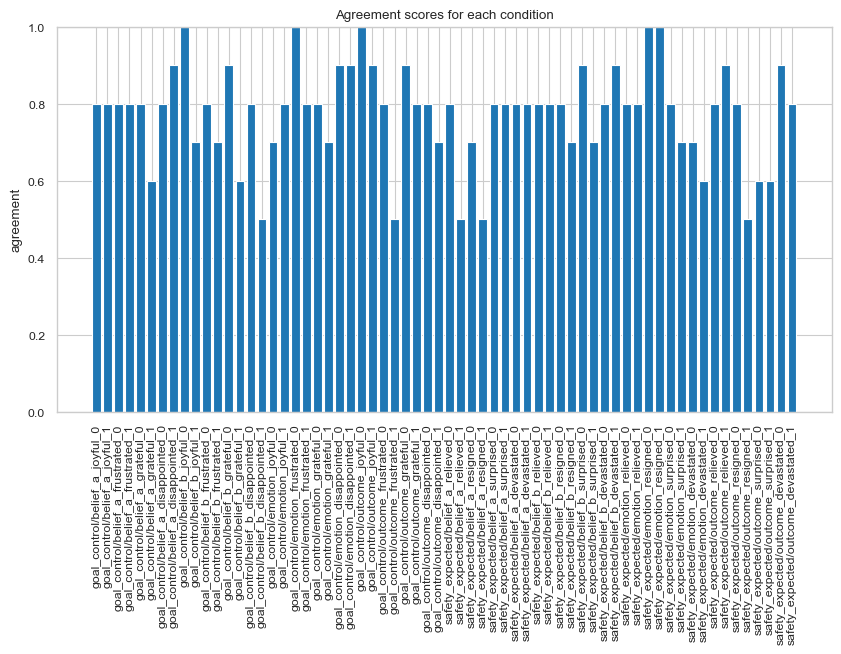

In [9]:
# plot gpt4_claude_0shot agreement by condition
plot_dict = {}
for condition in conditions:
    plot_dict[condition] = agreement_0shot[condition]

# plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(plot_dict)),
    [v for v in plot_dict.values()],
    tick_label=[k for k in plot_dict.keys()],
)
# rotate x labels
plt.xticks(rotation=90)
plt.ylim([0, 1])
plt.ylabel("agreement")
plt.title("Agreement scores for each condition")
plt.show()

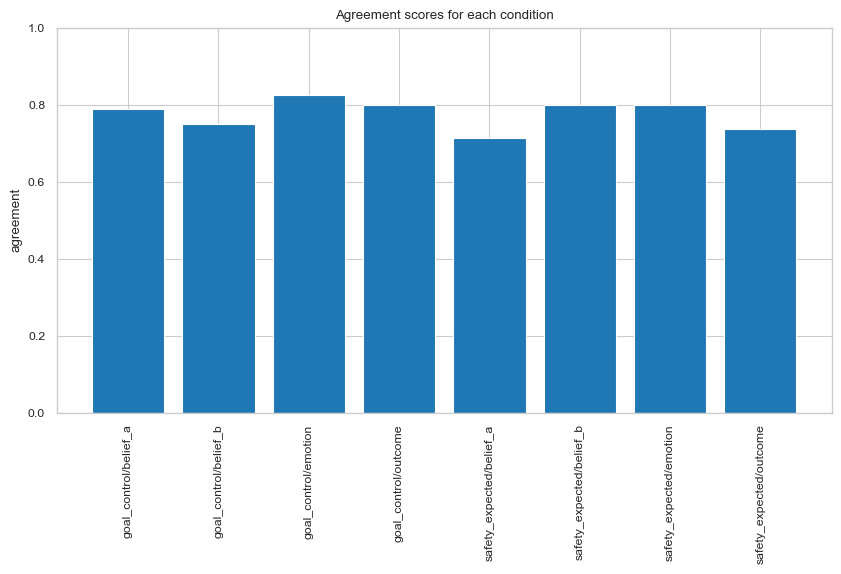

In [12]:
# plot gpt4_claude_0shot agreement by domain, inference type 
plot_dict = {}
for domain in domains:
    for inf in inferences:
        plot_dict[f"{domain}/{inf}"] = np.mean(
            [
                agreement_0shot[condition]
                for condition in conditions
                if domain in condition and inf in condition
            ]
        )


# plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(plot_dict)),
    [v for v in plot_dict.values()],
    tick_label=[k for k in plot_dict.keys()],
)
# rotate x labels
plt.xticks(rotation=90)
plt.ylim([0, 1])
plt.ylabel("agreement")
plt.title("Agreement scores for each condition")
plt.show()

<BarContainer object of 8 artists>

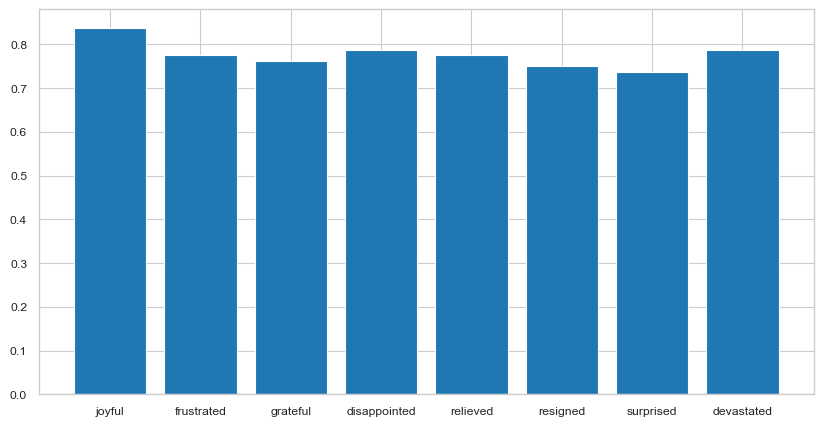

In [15]:
# plot gpt4_claude_0shot agreement by emotion
plot_dict = {}
for emotion in goal_control_emotions:
    plot_dict[f"{emotion}"] = np.mean(
        [
            agreement_0shot[condition]
            for condition in conditions
            if f"{emotion}" in condition
        ]
    )
for emotion in safety_expected_emotions:
    plot_dict[f"{emotion}"] = np.mean(
        [
            agreement_0shot[condition]
            for condition in conditions
            if f"{emotion}" in condition
        ]
    )

# plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(plot_dict)),
    [v for v in plot_dict.values()],
    tick_label=[k for k in plot_dict.keys()],
)



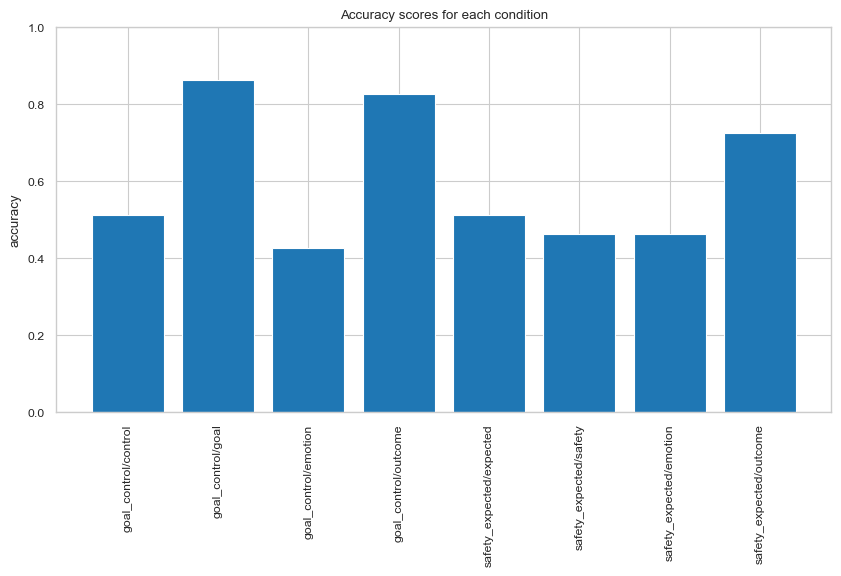

In [20]:
# plot accuracy of gpt4 cot by domain, inferences
plot_dict = {}
for domain in domains:
    for inf in inferences:
        if domain == "goal_control" and inf == "belief_a":
            inf_var = "control"
        elif domain == "goal_control" and inf == "belief_b":
            inf_var = "goal"
        elif domain == "safety_expected" and inf == "belief_a":
            inf_var = "expected"
        elif domain == "safety_expected" and inf == "belief_b":
            inf_var = "safety"
        else:
            inf_var = inf
        plot_dict[f"{domain}/{inf_var}"] = np.mean(
            [
                accuracy_gpt4_0shot_cot[condition]
                for condition in conditions
                if domain in condition and inf in condition
            ]
        )

# plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(plot_dict)),
    [v for v in plot_dict.values()],
    tick_label=[k for k in plot_dict.keys()],
)

# rotate x labels
plt.xticks(rotation=90)
plt.ylim([0, 1])
plt.ylabel("accuracy")
plt.title("Accuracy scores for each condition")
plt.show()



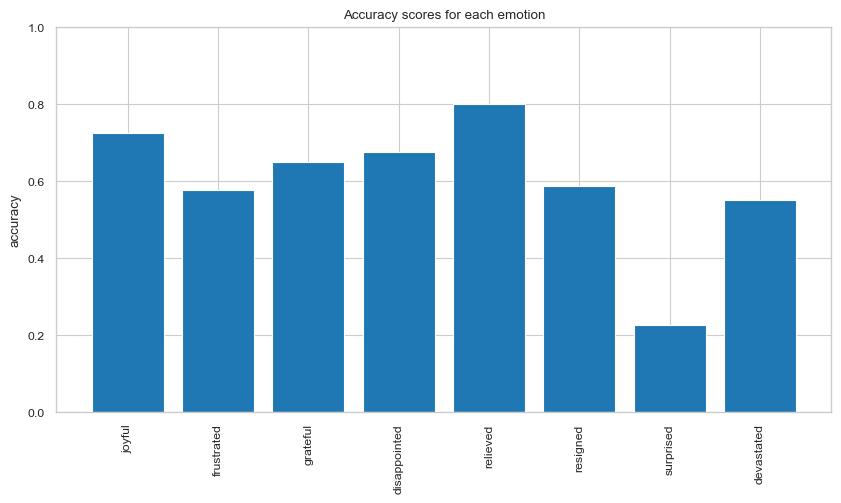

In [19]:
# plot accuracy of gpt4 cot by emotion
plot_dict = {}
for emotion in goal_control_emotions:
    plot_dict[f"{emotion}"] = np.mean(
        [
            accuracy_gpt4_0shot_cot[condition]
            for condition in conditions
            if f"{emotion}" in condition
        ]
    )
for emotion in safety_expected_emotions:
    plot_dict[f"{emotion}"] = np.mean(
        [
            accuracy_gpt4_0shot_cot[condition]
            for condition in conditions
            if f"{emotion}" in condition
        ]
    )

# plot
plt.figure(figsize=(10, 5))
plt.bar(
    range(len(plot_dict)),
    [v for v in plot_dict.values()],
    tick_label=[k for k in plot_dict.keys()],
)
plt.xticks(rotation=90)
plt.ylim([0, 1])
plt.ylabel("accuracy")
plt.title("Accuracy scores for each emotion")
plt.show()